# Tratamiento de datos
<hr>

In [1]:
import pandas as pd
import numpy as np

In [2]:
classification_data = pd.read_csv("../B3DB_classification.tsv",
                                  sep="\t")

In [3]:
classification_data.columns

Index(['NO.', 'compound_name', 'IUPAC_name', 'SMILES', 'CID', 'logBB',
       'BBB+/BBB-', 'Inchi', 'threshold', 'reference', 'group', 'comments'],
      dtype='object')

In [4]:
classification_data.head()

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,BBB+/BBB-,Inchi,threshold,reference,group,comments
0,1,sulphasalazine,2-hydroxy-5-[[4-(pyridin-2-ylsulfamoyl)phenyl]...,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,5339.0,-2.69,BBB-,InChI=1S/C18H14N4O5S/c23-16-9-6-13(11-15(16)18...,NaN,R2|R2|R25|R46|,A,NaN
1,2,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,3889.0,-2.52,BBB-,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,NaN,R25|,A,NaN
2,3,clioquinol,5-chloro-7-iodoquinolin-8-ol,Oc1c(I)cc(Cl)c2cccnc12,2788.0,-2.40,BBB-,InChI=1S/C9H5ClINO/c10-6-4-7(11)9(13)8-5(6)2-1...,NaN,R18|R26|R27|,A,NaN
3,4,bbcpd11 (cimetidine analog) (y-g13),2-[2-[(3-bromopyridin-2-yl)methylsulfanyl]ethy...,CCNC(=NCCSCc1ncccc1Br)NC#N,14022517.0,-2.15,BBB-,InChI=1S/C12H16BrN5S/c1-2-15-12(18-9-14)17-6-7...,NaN,R2|R2|R8|R40|R2|R2|R2|R2|R18|R21|R25|R25|R26|R...,A,NaN
4,5,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,18595497.0,-2.15,BBB-,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,NaN,R25|,A,NaN


In [5]:
classification_data["BBB+/BBB-"].value_counts()

BBB+/BBB-
BBB+    4956
BBB-    2851
Name: count, dtype: int64

In [6]:
df = classification_data[["SMILES", "BBB+/BBB-"]]

In [7]:
df.head()

,SMILES,BBB+/BBB-
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,BBB-
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,BBB-
2,Oc1c(I)cc(Cl)c2cccnc12,BBB-
3,CCNC(=NCCSCc1ncccc1Br)NC#N,BBB-
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,BBB-


# Calcular Descriptores moleculares con RDKIT
<hr>

In [8]:
from rdkit import Chem
from rdkit.Chem import Descriptors


In [9]:
def calcular_mol(Smiles):
    molecula = Chem.MolFromSmiles(Smiles)
    return(molecula)

In [10]:
df.loc[:, "mol"] = df["SMILES"].apply(calcular_mol)

C:\Users\Eliud\AppData\Local\Temp\ipykernel_5316\2543374636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "mol"] = df["SMILES"].apply(calcular_mol)


In [11]:
df.head()

,SMILES,BBB+/BBB-,mol
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,BBB-,<rdkit.Chem.rdchem.Mol object at 0x00000280F0B...
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,BBB-,<rdkit.Chem.rdchem.Mol object at 0x00000280F0C...
2,Oc1c(I)cc(Cl)c2cccnc12,BBB-,<rdkit.Chem.rdchem.Mol object at 0x00000280F0C...
3,CCNC(=NCCSCc1ncccc1Br)NC#N,BBB-,<rdkit.Chem.rdchem.Mol object at 0x00000280F0C...
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,BBB-,<rdkit.Chem.rdchem.Mol object at 0x00000280F0C...


In [12]:
df.to_csv("solo_smiles.csv", index=False)

In [13]:
def calcular_descriptores(mol):
    
    mol = Descriptors.CalcMolDescriptors(mol)
    return pd.Series(mol)

In [14]:
df_descriptores = df['mol'].apply(calcular_descriptores)

[14:20:06] DEPRECATION WARNING: please use MorganGenerator
[14:20:06] DEPRECATION WARNING: please use MorganGenerator
[14:20:06] DEPRECATION WARNING: please use MorganGenerator
[14:20:06] DEPRECATION WARNING: please use MorganGenerator
[14:20:06] DEPRECATION WARNING: please use MorganGenerator
[14:20:06] DEPRECATION WARNING: please use MorganGenerator
[14:20:06] DEPRECATION WARNING: please use MorganGenerator
[14:20:06] DEPRECATION WARNING: please use MorganGenerator
[14:20:06] DEPRECATION WARNING: please use MorganGenerator
[14:20:06] DEPRECATION WARNING: please use MorganGenerator
[14:20:06] DEPRECATION WARNING: please use MorganGenerator
[14:20:06] DEPRECATION WARNING: please use MorganGenerator
[14:20:06] DEPRECATION WARNING: please use MorganGenerator
[14:20:06] DEPRECATION WARNING: please use MorganGenerator
[14:20:06] DEPRECATION WARNING: please use MorganGenerator
[14:20:06] DEPRECATION WARNING: please use MorganGenerator
[14:20:06] DEPRECATION WARNING: please use MorganGenerat

In [16]:
df_descriptores.shape

(7807, 210)

In [16]:
df_descriptores.to_csv("descriptores calculados.csv")

# Filtro de baja varianza
<hr>

In [17]:
from sklearn.feature_selection import VarianceThreshold

In [18]:
selector = VarianceThreshold(threshold=0.1)

In [19]:
df_filtrado = selector.fit_transform(df_descriptores)

In [20]:
selector.get_support()

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [21]:
caracteristicas_seleccionadas = df_descriptores.columns[selector.get_support()]

In [22]:
caracteristicas_seleccionadas

Index(['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinEStateIndex', 'SPS', 'MolWt',
       'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons',
       'FpDensityMorgan3', 'BCUT2D_MWHI',
       ...
       'fr_halogen', 'fr_ketone', 'fr_ketone_Topliss', 'fr_methoxy',
       'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond',
       'fr_piperdine', 'fr_sulfide', 'fr_unbrch_alkane'],
      dtype='object', length=140)

In [24]:
des_final = df_descriptores[caracteristicas_seleccionadas]

In [26]:
correlation_matrix = des_final.corr().abs()
threshold = 0.8

In [27]:
correlation_matrix

,MaxAbsEStateIndex,MaxEStateIndex,MinEStateIndex,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,FpDensityMorgan3,BCUT2D_MWHI,...,fr_halogen,fr_ketone,fr_ketone_Topliss,fr_methoxy,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_piperdine,fr_sulfide,fr_unbrch_alkane
MaxAbsEStateIndex,1.000000,0.999997,0.543261,0.409396,0.488353,0.492757,0.488515,0.489830,0.069864,0.003383,...,0.181895,0.433658,0.381037,0.069636,0.141602,0.094169,0.095527,0.041222,0.095986,0.021733
MaxEStateIndex,0.999997,1.000000,0.543063,0.409396,0.488383,0.492785,0.488545,0.489862,0.069994,0.003398,...,0.181757,0.433665,0.381044,0.069645,0.141591,0.094176,0.095534,0.041212,0.095994,0.021729
MinEStateIndex,0.543261,0.543063,1.000000,0.208945,0.345193,0.357816,0.345223,0.323011,0.134565,0.109645,...,0.341026,0.229472,0.212876,0.025108,0.130803,0.072119,0.071883,0.133841,0.065729,0.014031
SPS,0.409396,0.409396,0.208945,1.000000,0.309326,0.293559,0.309562,0.354463,0.147378,0.159825,...,0.003859,0.572263,0.479789,0.013416,0.198991,0.039873,0.043836,0.085082,0.045466,0.052401
MolWt,0.488353,0.488383,0.345193,0.309326,1.000000,0.998952,0.999998,0.985657,0.238054,0.080565,...,0.081418,0.257055,0.269734,0.247961,0.011293,0.254614,0.258005,0.002705,0.134984,0.045665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_phenol,0.094169,0.094176,0.072119,0.039873,0.254614,0.259039,0.254762,0.257064,0.052877,0.088993,...,0.093713,0.202877,0.204380,0.045572,0.087054,1.000000,0.996117,0.030905,0.041515,0.004625
fr_phenol_noOrthoHbond,0.095527,0.095534,0.071883,0.043836,0.258005,0.262383,0.258151,0.260421,0.051216,0.088742,...,0.092623,0.205204,0.206616,0.046906,0.086802,0.996117,1.000000,0.032323,0.040482,0.005373
fr_piperdine,0.041222,0.041212,0.133841,0.085082,0.002705,0.009693,0.002563,0.013516,0.133515,0.087839,...,0.071098,0.102482,0.050939,0.124625,0.075972,0.030905,0.032323,1.000000,0.113990,0.006584
fr_sulfide,0.095986,0.095994,0.065729,0.045466,0.134984,0.152458,0.134956,0.081471,0.157146,0.211780,...,0.079867,0.139280,0.145236,0.050251,0.066086,0.041515,0.040482,0.113990,1.000000,0.035346


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

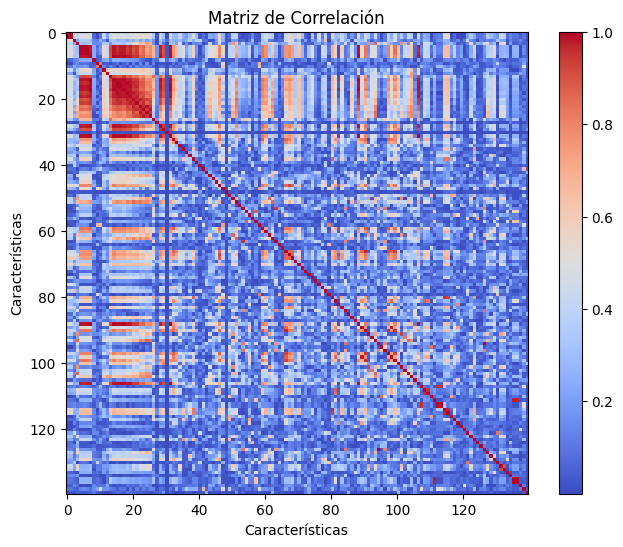

In [29]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el mapa de calor usando matplotlib
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Añadir barra de color
plt.colorbar(heatmap)

# Añadir etiquetas
plt.title('Matriz de Correlación')
plt.xlabel('Características')
plt.ylabel('Características')

# Mostrar el gráfico
plt.show()

In [30]:
# Definir un umbral de correlación
threshold = 0.8  # Por ejemplo, considerar correlaciones superiores a 0.8 como altas

# Encontrar pares de características con alta correlación
high_correlation_pairs = []

# Iterar sobre la matriz de correlación
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))



In [31]:
for feature1, feature2, corr_value in high_correlation_pairs:
    
    # Eliminar la característica feature2
    if feature2 in des_final.columns:
        des_final.drop(columns=[feature2], inplace=True)

C:\Users\Eliud\AppData\Local\Temp\ipykernel_2800\1765915826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des_final.drop(columns=[feature2], inplace=True)
C:\Users\Eliud\AppData\Local\Temp\ipykernel_2800\1765915826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des_final.drop(columns=[feature2], inplace=True)
C:\Users\Eliud\AppData\Local\Temp\ipykernel_2800\1765915826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des_f

In [32]:
des_final.shape

(7807, 81)

In [33]:
correlation_matrix = des_final.corr().abs()
threshold = 0.8

In [34]:
correlation_matrix

,MaxAbsEStateIndex,MinEStateIndex,SPS,MolWt,FpDensityMorgan3,BCUT2D_MWHI,AvgIpc,BalabanJ,Ipc,Kappa3,...,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ether,fr_ketone,fr_methoxy,fr_para_hydroxylation,fr_piperdine,fr_sulfide,fr_unbrch_alkane
MaxAbsEStateIndex,1.000000,0.543261,0.409396,0.488353,0.069864,0.003383,0.422784,0.214286,0.028271,0.007327,...,0.093850,0.354179,0.290054,0.222686,0.433658,0.069636,0.141602,0.041222,0.095986,0.021733
MinEStateIndex,0.543261,1.000000,0.208945,0.345193,0.134565,0.109645,0.163479,0.030585,0.012079,0.073350,...,0.117502,0.133710,0.103716,0.144196,0.229472,0.025108,0.130803,0.133841,0.065729,0.014031
SPS,0.409396,0.208945,1.000000,0.309326,0.147378,0.159825,0.341198,0.329930,0.009307,0.009010,...,0.229587,0.571990,0.224606,0.314964,0.572263,0.013416,0.198991,0.085082,0.045466,0.052401
MolWt,0.488353,0.345193,0.309326,1.000000,0.238054,0.080565,0.546422,0.425706,0.171216,0.015881,...,0.034471,0.357458,0.385828,0.553618,0.257055,0.247961,0.011293,0.002705,0.134984,0.045665
FpDensityMorgan3,0.069864,0.134565,0.147378,0.238054,1.000000,0.037635,0.216072,0.245827,0.070469,0.074718,...,0.072187,0.119158,0.099210,0.178580,0.045136,0.069617,0.044747,0.133515,0.157146,0.112957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_methoxy,0.069636,0.025108,0.013416,0.247961,0.069617,0.082723,0.196408,0.104393,0.006783,0.003660,...,0.029875,0.051333,0.216118,0.548693,0.023741,1.000000,0.015070,0.124625,0.050251,0.021656
fr_para_hydroxylation,0.141602,0.130803,0.198991,0.011293,0.044747,0.048581,0.008405,0.099237,0.107561,0.005248,...,0.100687,0.005037,0.059538,0.046404,0.130208,0.015070,1.000000,0.075972,0.066086,0.019288
fr_piperdine,0.041222,0.133841,0.085082,0.002705,0.133515,0.087839,0.091218,0.220994,0.007657,0.007023,...,0.016696,0.011986,0.004724,0.003656,0.102482,0.124625,0.075972,1.000000,0.113990,0.006584
fr_sulfide,0.095986,0.065729,0.045466,0.134984,0.157146,0.211780,0.174269,0.169133,0.006833,0.004989,...,0.113729,0.079652,0.017426,0.111338,0.139280,0.050251,0.066086,0.113990,1.000000,0.035346


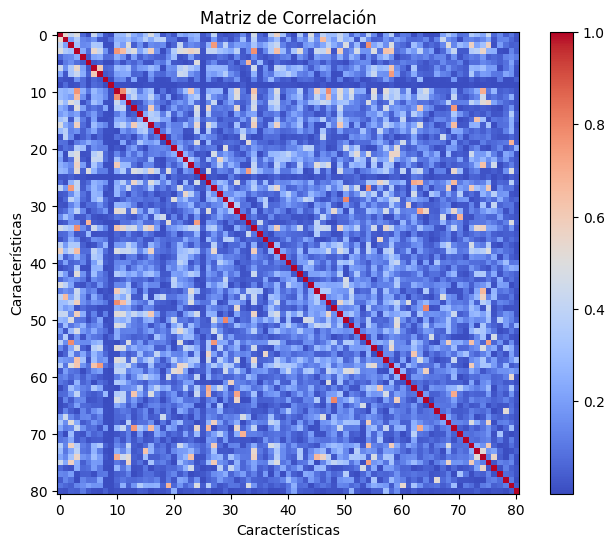

In [35]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el mapa de calor usando matplotlib
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Añadir barra de color
plt.colorbar(heatmap)

# Añadir etiquetas
plt.title('Matriz de Correlación')
plt.xlabel('Características')
plt.ylabel('Características')

# Mostrar el gráfico
plt.show()

In [36]:
df_final = pd.concat((df, des_final), axis=1)

In [37]:
df_final.shape

(7807, 84)

In [38]:
df_final.head()

,SMILES,BBB+/BBB-,mol,MaxAbsEStateIndex,MinEStateIndex,SPS,MolWt,FpDensityMorgan3,BCUT2D_MWHI,AvgIpc,...,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ether,fr_ketone,fr_methoxy,fr_para_hydroxylation,fr_piperdine,fr_sulfide,fr_unbrch_alkane
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,BBB-,<rdkit.Chem.rdchem.Mol object at 0x0000017BF3A...,12.341010,-3.794932,11.428571,398.400,2.285714,32.233272,2.676891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,BBB-,<rdkit.Chem.rdchem.Mol object at 0x0000017B936...,13.190522,-2.144257,22.000000,520.480,2.555556,32.166556,3.253857,...,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
2,Oc1c(I)cc(Cl)c2cccnc12,BBB-,<rdkit.Chem.rdchem.Mol object at 0x0000017B936...,9.654043,0.195000,10.615385,305.502,3.000000,126.912704,2.146240,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CCNC(=NCCSCc1ncccc1Br)NC#N,BBB-,<rdkit.Chem.rdchem.Mol object at 0x0000017B936...,8.544584,0.532052,10.894737,342.266,3.157895,79.918731,2.405844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,BBB-,<rdkit.Chem.rdchem.Mol object at 0x0000017B936...,11.445328,-1.798901,45.303030,461.467,2.696970,16.712087,3.141364,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
df_final.to_csv("df_con_descriptores_tratado.csv", index=False)